In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import datasets
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

#logistic regression
from sklearn.linear_model import LogisticRegression

#Decision Tree
from sklearn.tree import DecisionTreeClassifier

#KNN
from sklearn.neighbors import KNeighborsClassifier

#Gaussian
from sklearn.naive_bayes import GaussianNB

#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [3]:
#Read Datasets
df = pd.read_csv("fifa20.csv")
pd.set_option('display.max_columns',None)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

In [4]:
# df[df['team_position'] == 'SUB']

In [5]:
df_p = df.copy()
df.shape

(18278, 104)

In [6]:
df.team_position.unique()
# df_p[df_p['team_position'].isnull()]
# df_p['team_position'][327] = df_p['player_positions']

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'SUB', 'LB', 'LS', 'RB', 'RDM', 'RES',
       'RAM', 'RS', 'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'],
      dtype=object)

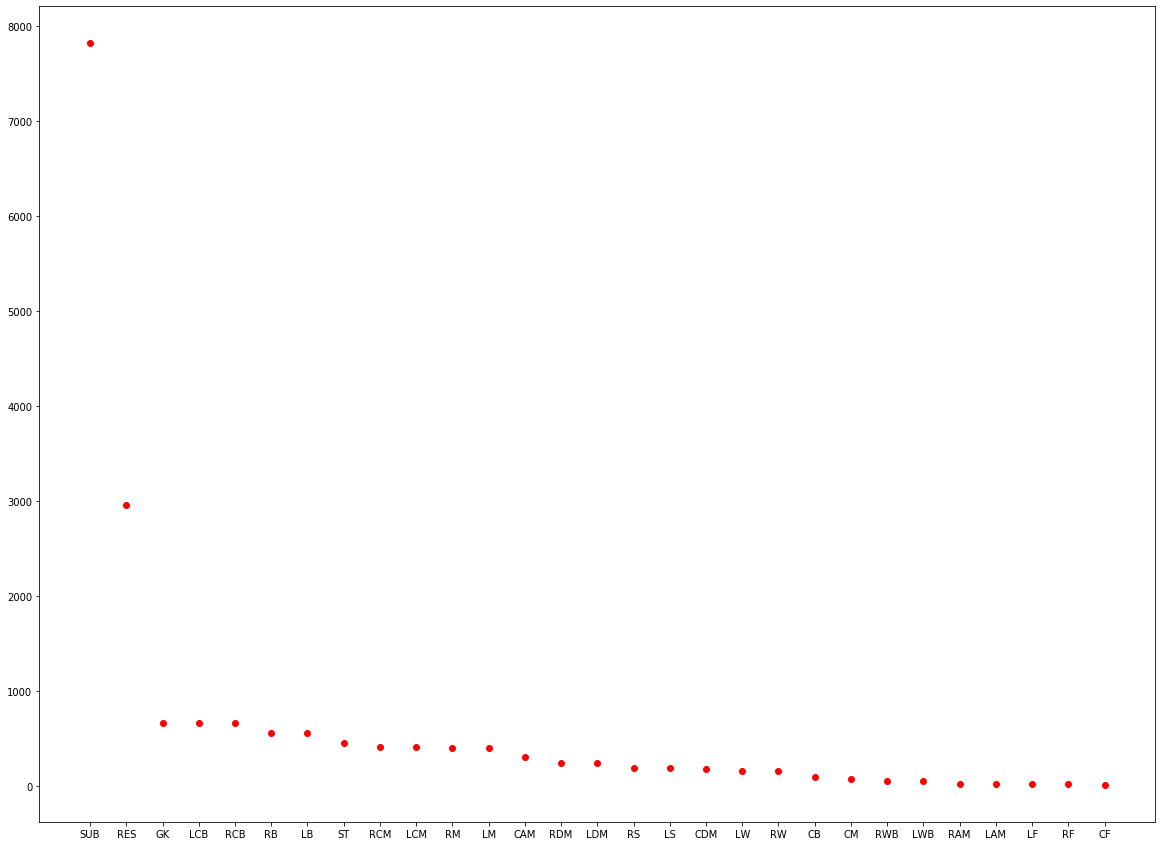

In [7]:
plt.figure(figsize=(20,15))
plt.plot(df_p.team_position.value_counts(), 'ro')

In [8]:
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1298
player_tags  =  16779
team_position  =  240
team_jersey_number  =  240
loaned_from  =  17230
joined  =  1288
contract_valid_until  =  240
nation_position  =  17152
nation_jersey_number  =  17152
pace  =  2036
shooting  =  2036
passing  =  2036
dribbling  =  2036
defending  =  2036
physic  =  2036
gk_diving  =  16242
gk_handling  =  16242
gk_kicking  =  16242
gk_reflexes  =  16242
gk_speed  =  16242
gk_positioning  =  16242
player_traits  =  10712
ls  =  2036
st  =  2036
rs  =  2036
lw  =  2036
lf  =  2036
cf  =  2036
rf  =  2036
rw  =  2036
lam  =  2036
cam  =  2036
ram  =  2036
lm  =  2036
lcm  =  2036
cm  =  2036
rcm  =  2036
rm  =  2036
lwb  =  2036
ldm  =  2036
cdm  =  2036
rdm  =  2036
rwb  =  2036
lb  =  2036
lcb  =  2036
cb  =  2036
rcb  =  2036
rb  =  2036


In [9]:
null_col = [
    'team_position',
]
df_p = df_p.dropna(subset=null_col)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1058
player_tags  =  16562
loaned_from  =  16990
joined  =  1048
nation_position  =  17152
nation_jersey_number  =  17152
pace  =  1996
shooting  =  1996
passing  =  1996
dribbling  =  1996
defending  =  1996
physic  =  1996
gk_diving  =  16042
gk_handling  =  16042
gk_kicking  =  16042
gk_reflexes  =  16042
gk_speed  =  16042
gk_positioning  =  16042
player_traits  =  10588
ls  =  1996
st  =  1996
rs  =  1996
lw  =  1996
lf  =  1996
cf  =  1996
rf  =  1996
rw  =  1996
lam  =  1996
cam  =  1996
ram  =  1996
lm  =  1996
lcm  =  1996
cm  =  1996
rcm  =  1996
rm  =  1996
lwb  =  1996
ldm  =  1996
cdm  =  1996
rdm  =  1996
rwb  =  1996
lb  =  1996
lcb  =  1996
cb  =  1996
rcb  =  1996
rb  =  1996


In [10]:
#Replace Null Value

coloumns = [
    'dribbling',
    'pace',
    'shooting',
    'passing',
    'defending',
    'physic',
    'gk_diving',
    'gk_handling',
    'gk_kicking',
    'gk_reflexes',
    'gk_speed',
    'gk_positioning',
]

str_columns = [
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb'
]

for col in coloumns:
    df_p.loc[df_p[col].isnull(), col] = 0
    
for col in str_columns:
    df_p.loc[df_p[col].isnull(), col] = '0'
    
for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

release_clause_eur  =  1058
player_tags  =  16562
loaned_from  =  16990
joined  =  1048
nation_position  =  17152
nation_jersey_number  =  17152
player_traits  =  10588


In [11]:
# delete feature

coloumns = [
    'dob',
    'sofifa_id',
    'player_url',
    'long_name',
    'nationality',
    'club',
    'player_positions',
    'body_type',
    'real_face',
    'team_jersey_number',
    'contract_valid_until',
    'release_clause_eur',
    'player_tags',
    'loaned_from',
    'joined',
    'nation_position',
    'nation_jersey_number',
    'player_traits',
    'ls',
    'st',
    'rs',
    'lw',
    'lf',
    'cf',
    'rf',
    'rw',
    'lam',
    'cam',
    'ram',
    'lm',
    'lcm',
    'cm',
    'rcm',
    'rm',
    'lwb',
    'ldm',
    'cdm',
    'rdm',
    'rwb',
    'lb',
    'lcb',
    'cb',
    'rcb',
    'rb',
]

for col in coloumns:
    df_p = df_p.drop(col, axis=1)

for col in df_p.columns:
    if df_p[col].isnull().sum() > 0:
        print(col, ' = ', df_p[col].isnull().sum())

In [12]:
df_p

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,Left,5,4,4,Medium/Low,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,Right,5,4,5,High/Low,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,Right,5,5,5,High/Medium,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,Right,3,3,1,Medium/Medium,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,Right,4,4,4,High/Medium,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,2000,Right,1,3,2,Medium/High,RES,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,2000,Right,1,2,2,Medium/Medium,SUB,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,1000,Right,1,2,2,Low/Medium,SUB,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,1000,Right,1,2,2,Low/Low,SUB,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


In [13]:
b_fit = df_p.team_position.unique()

In [14]:
le = LabelEncoder()
df_p['preferred_foot'] = le.fit_transform(df_p['preferred_foot'])
df_p['work_rate'] = le.fit_transform(df_p['work_rate'])
# df_p['team_position'] = le.fit_transform(df_p['team_position'])

In [15]:
a_fit = df_p.team_position.unique()

In [16]:
klasifikasi_arr = [b_fit, a_fit]
i = 14
print(klasifikasi_arr[0][i], klasifikasi_arr[1][i])

SUB SUB


In [17]:
df_p

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,team_position,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,0,5,4,4,7,RW,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,1,5,4,5,1,LW,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,1,5,5,5,2,CAM,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,1,3,3,1,8,GK,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,1,4,4,4,2,LW,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,Shao Shuai,22,186,79,48,56,40000,2000,1,1,3,2,6,RES,57.0,23.0,28.0,33.0,47.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,Xiao Mingjie,22,177,66,48,56,40000,2000,1,1,2,2,8,SUB,58.0,24.0,33.0,35.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,Zhang Wei,19,186,75,48,56,40000,1000,1,1,2,2,5,SUB,54.0,35.0,44.0,45.0,48.0,51.0,0.0,0.0,0.0,0.0,0.0,0.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,Wang Haijian,18,185,74,48,54,40000,1000,1,1,2,2,4,SUB,59.0,35.0,47.0,47.0,45.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


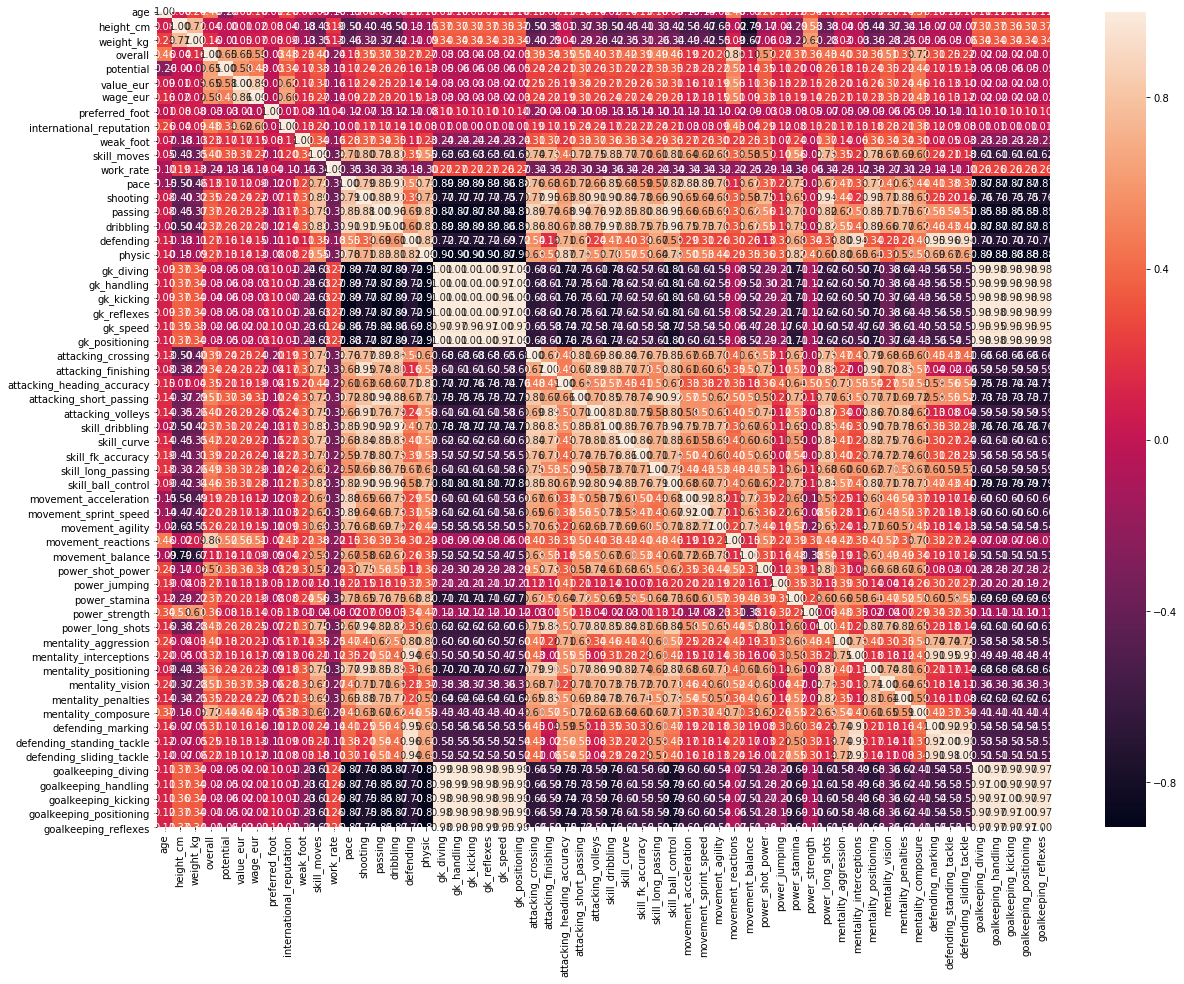

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(df_p.corr(), annot=True, fmt='.2f');

In [19]:
X_le = df_p.drop('team_position', axis=1)
X_le = X_le.drop('short_name', axis=1)
y = df_p['team_position']
X_train, X_test, y_train, y_test = train_test_split(X_le, y, test_size=0.25, random_state=0)

In [20]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [61]:
nr = NearMiss()
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel())

In [62]:
Counter(y_train_miss)

Counter({'CAM': 12,
         'CB': 12,
         'CDM': 12,
         'CF': 12,
         'CM': 12,
         'GK': 12,
         'LAM': 12,
         'LB': 12,
         'LCB': 12,
         'LCM': 12,
         'LDM': 12,
         'LF': 12,
         'LM': 12,
         'LS': 12,
         'LW': 12,
         'LWB': 12,
         'RAM': 12,
         'RB': 12,
         'RCB': 12,
         'RCM': 12,
         'RDM': 12,
         'RES': 12,
         'RF': 12,
         'RM': 12,
         'RS': 12,
         'RW': 12,
         'RWB': 12,
         'ST': 12,
         'SUB': 12})

In [63]:
X_train_miss.shape

(348, 58)

In [41]:
class Report:
    def __init__(self, X_test, y_test):
        self.X = X_test
        self.y = y_test
    
    def metrics(self, model):
        y_pred = model.predict(self.X)
        
        print('Accuracy score:\n')
        print(accuracy_score(self.y, y_pred))
        
        print('\nConfusion Matrix:\n')
        print(confusion_matrix(self.y, y_pred))
        
        print('\nClassification Report:\n')
        print(classification_report(self.y, y_pred))
    

In [42]:
report = Report(X_test, y_test)

In [68]:
dt = DecisionTreeClassifier(max_depth=50).fit(X_train_miss, y_train_miss)
report.metrics(dt)

Accuracy score:

0.08447893569844789

Confusion Matrix:

[[  2   0   0  10   5   0  11   1   0   2   2  20   0   0   0   4  12   2
    0   0   0   3   5   0   3   4   4   1   0]
 [  0  13   1   0   1   0   0   0   1   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   4   0   0]
 [  0   6   0   3   6   0   1   3   0   0   3   5   0   0   1   1   2   1
    0   1   2   1   3   0   0   0   4   1   1]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   1   1   0   0   0   0   1   2   4   0   0   0   0   0   0
    0   0   0   0   1   0   1   1   5   0   0]
 [  0   0   0   0   0 173   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   1   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0   1   0   0   0   1   0
    0   0   0   0   1   0   0   0   0   0   0]
 [  0  13   8   0   0   0   0  53   0   4   2   0   0   0   0  24   6   2
    0   0   1   6   1 

In [73]:
rf = RandomForestClassifier().fit(X_train_res, y_train_res)
report.metrics(rf)

Accuracy score:

0.30221729490022176

Confusion Matrix:

[[ 23   0   1   0   0   0   1   2   0   9   2   0  12   3   2   0   2   1
    0  12   2   5   0   7   0   2   0   1   4]
 [  0   1   0   0   0   0   0   0   4   0   0   0   0   0   0   0   0   0
   14   0   0   0   0   0   0   0   0   0   2]
 [  0   0  10   0   0   0   0   0   1   4   6   0   0   0   0   0   0   1
    4   4   8   1   0   0   0   0   0   0   6]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   0]
 [  1   0   3   0   1   0   0   0   0   3   5   0   0   0   0   0   0   0
    0   3   1   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0 150   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   5   0   0   0   0   0   0  25]
 [  3   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 106   6   0   0   0   2   0   0   0   0  12
    2   0   1   5   0 

In [72]:
knn = KNeighborsClassifier().fit(X_train_miss, y_train_miss)
report.metrics(knn)

Accuracy score:

0.00753880266075388

Confusion Matrix:

[[  2   4   0  27   1   0  18   0   0   0   0  10   0   0   1   8   9   0
    0   0   1   0   2   1   3   2   2   0   0]
 [  0   0   0   3   1   0   2   0   0   0   0   4   0   0   0   3   4   0
    0   0   0   0   0   0   2   1   1   0   0]
 [  0   1   2   7   1   0   8   0   0   0   1   3   0   0   1   6   8   0
    0   0   0   0   4   0   0   0   3   0   0]
 [  0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   4   1   0   6   0   0   0   0   0   0   0   0   3   1   0
    0   0   0   0   1   0   1   0   0   0   0]
 [  0   5   0  45   5   2  26   1   1   1   0   6   0   4   0  18  42   0
    0   0   1   1   5   0   3   0  13   1   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   1   0   1   0   0   0   0]
 [  0   5   2  18   2   0  23   1   0   0   0   6   0   3   1  21  32   0
    0   1   0   0   3 

In [71]:
log = LogisticRegression().fit(X_train_res, y_train_res)
report.metrics(log)

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score:

0.0022172949002217295

Confusion Matrix:

[[   0    0    0   52    0    0    0    0    0    0    0    0    0    0
     0    0   26    0    0    0    0    0    0    0    0   13    0    0
     0]
 [   0    2    0   16    0    0    0    0    0    0    0    0    0    0
     0    0    2    0    0    0    0    0    0    0    0    1    0    0
     0]
 [   0    4    0   31    0    0    0    0    0    0    0    0    0    0
     0    0    5    0    0    0    0    0    0    0    0    5    0    0
     0]
 [   0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    1    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    1    0    6    0    0    0    0    0    0    0    0    0    0
     0    0    4    0    0    0    0    0    0    0    0    7    0    0
     0]
 [   0   20    0   95    0    0    0    0    0    0    0    0    0    0
     1    0   28    0    0    0    0    0    0    0    0   36    0    0
     0]
 [   0    0    0    2    0   

C:\Users\Immelman\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
y_pred = rf.predict(X_test)
hasil = [y_pred, y_test]
df_hasil = pd.DataFrame(hasil, index=['Predicted','Actual']) 
df_hasil

0    1    2    3    4    5    6    7    8    9   10   11   12  \
Predicted  SUB  SUB  SUB  SUB  SUB  RES  SUB  SUB  SUB  RES  SUB  SUB  SUB   
Actual     SUB  SUB  LCM  SUB  SUB  RES  LDM  LCB  RDM  LCB  RES  SUB  SUB   

            13   14   15   16   17   18   19   20   21   22   23   24   25  \
Predicted  SUB  SUB  SUB  SUB  RCB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB   
Actual     RES  SUB  RCB   LB  SUB  RES  LCM  RCM  CAM  RCM   RS   CB  SUB   

            26   27   28   29   30   31   32   33   34   35   36   37   38  \
Predicted  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  RES  SUB  RES  SUB   
Actual     SUB  SUB  LCM  SUB   LM  RES  SUB  RES  RES  RES  RCB  SUB  RDM   

            39   40   41   42   43   44   45   46  47   48  49   50   51  52  \
Predicted  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  GK  RCB  LM  SUB  SUB  ST   
Actual     SUB  RCM  LDM  LCB  SUB  SUB  SUB  RES  GK  SUB  LM  SUB  SUB  ST   

            53   54   55   56   57   58  59   60   61  62   63   64  65   66  \
Predicted  SUB  SUB  SUB  SUB  SUB  SUB  GK  SUB  SUB  GK  SUB  RCB  GK  SUB   
Actual     RES  SUB  SUB   LB  SUB  SUB  GK  SUB  RES  GK  SUB  LDM  GK   ST   

            67   68   69   70   71   72   73   74   75   76   77  78   79  \
Predicted  SUB  SUB   GK  SUB  SUB  SUB  RES  SUB  SUB  SUB  SUB  GK  SUB   
Actual     SUB  SUB  RES  SUB   RM  SUB  RES  RDM  SUB  LDM   ST  GK  SUB   

            80   81  82   83   84   85   86   87   88   89   90   91   92  93  \
Predicted   GK  SUB  ST  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB   GK  GK   
Actual     SUB   ST  RS  SUB  SUB  SUB  LCB  SUB  SUB  SUB  SUB  SUB  SUB  GK   

            94   95   96   97   98   99  100  101  102  103  104  105  106  \
Predicted  SUB  SUB  RES  SUB  LCB  LCB  SUB  SUB  SUB  SUB  SUB  SUB  SUB   
Actual     SUB   RM  SUB  RES   CB  LCB  SUB   ST  SUB  RCB  SUB  LCB  SUB   

           107  108  109  110  111  112 113  114  115  116  117  118  119  \
Predicted  SUB  SUB  SUB  SUB  SUB  SUB  LB   GK  SUB  SUB  SUB  SUB  SUB   
Actual      RM  SUB   LM  SUB  SUB   LS  LB  SUB  RES   RW   RB  RCM   RM   

           120  121  122  123  124  125 126  127  128  129  130  131  132  \
Predicted   GK  SUB  SUB  SUB  SUB  SUB  ST  SUB  SUB  SUB  RES  SUB  SUB   
Actual     SUB  RES  RES  CDM  SUB   LB  ST  SUB  SUB  LDM  SUB  SUB  SUB   

           133 134  135  136  137  138  139  140  141 142  143  144  145  146  \
Predicted  SUB  RB  RCB  SUB   GK  SUB  SUB  SUB  LCB  RB  RES  SUB  SUB  RES   
Actual     LCB  RB  SUB  SUB  SUB  SUB  SUB  SUB  LCB  RB  RES  LCB  RCB   GK   

           147  148  149  150  151  152  153  154  155  156  157 158  159  \
Predicted  RES  SUB  SUB  RES  SUB  SUB  SUB  SUB  SUB  SUB  RCB  ST  SUB   
Actual     RES  SUB  SUB  SUB  SUB  SUB  LCB  SUB  SUB  SUB  RCB  ST  LCM   

           160  161 162  163  164  165  166  167  168  169  170  171  172  \
Predicted  SUB  SUB  LB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  RCB  SUB   
Actual     RCB  SUB  LB  LDM   LM  LCM   RW   ST   LB  RES  SUB  RES  SUB   

           173  174  175  176  177  178  179  180  181  182  183  184  185  \
Predicted  SUB  SUB   GK  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB   
Actual     SUB   LS  SUB  RCM  RES  SUB  RES   LS  SUB  LCB  SUB  SUB  SUB   

           186  187 188  189  190  191  192  193  194  195  196  197  198  \
Predicted  RCB  SUB  GK  SUB  SUB  SUB  SUB  RES  SUB  SUB  SUB  SUB  SUB   
Actual     RCB  RES  GK  RES  RES  RES  SUB  SUB  SUB  SUB  RES  RES  SUB   

           199  200  201  202  203  204  205  206  207  208  209  210  211  \
Predicted  SUB  RES  SUB  SUB  SUB  SUB  SUB  SUB  SUB  RCB  SUB  SUB  SUB   
Actual     SUB  RES  RES  CDM  SUB   LM  LCM  SUB  RCM  LCB   RB  SUB   LM   

           212  213  214  215  216  217  218  219  220  221  222 223  224  \
Predicted   RB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  SUB  GK  SUB   
Actual     SUB  RDM  SUB  RCM  SUB  SUB  SUB  SUB  SUB  SUB  RCM  GK  RCB   

         